In [54]:
from __future__ import print_function
from io import BytesIO
from IPython.display import clear_output, Image, display, HTML

import numpy as np
from numpy import linalg
from numpy.linalg import norm

from scipy.spatial.distance import squareform, pdist

import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

import cv2, os
import PIL.Image

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


(1797, 64) (1797, 8, 8)
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
[array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.]), array([  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.]), array([  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.]), array([  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.]), array([ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.]), array([  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.]), array([  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.]), array([  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])]


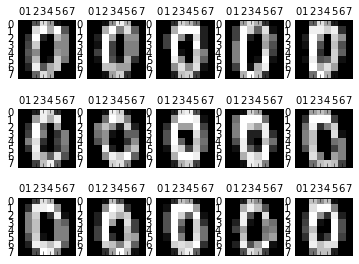

In [85]:
digits = load_digits()
print(digits.data.shape, digits.images.shape)
print(digits.data)
nrows, ncols = 3, 5
plt.figure(figsize=(6,4.5))
plt.gray()
X = np.vstack([digits.data[digits.target==i] for i in range(10)])
print(np.split(X[0], 8))
for i in range(ncols * nrows):
    bx = plt.subplot(nrows, ncols, i + 1)
    bx.matshow(np.split(X[i], 8))

In [49]:
def extractFrames(videoCapture, frameDistance=100, startPosition=0):
    frameN = 0
    position = startPosition
    videoCapture.set(0, position)
    os.makedirs("./frames")
    while True:
        success, frame = videoCapture.read()
        if not success:
            print("[DONE, extracted %s frames]" % (frameN))
            break
        cv2.imwrite("./frames/%s.jpg" % (frameN), frame)
        print("\rEXTRACTING...[%s]" % (frameN), end=" ")
        frameN += 1
        position += frameDistance
        videoCapture.set(0, position)

def test():
    video = cv2.VideoCapture("video.mp4")
    video.set(0, 0)
    _, frame = video.read()
    frame = np.float32(frame)
    print(frame.dtype, frame.shape, frame[240,427])
    showarray(frame/255)
    cv2.imwrite("prova.jpg", frame)
    frame0 = PIL.Image.open("prova.jpg")
    frame0 = np.float32(frame0)
    print(frame0.dtype, frame0.shape, frame0[240, 427])
    showarray(frame0/255.0)
    
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 1)*255)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

float32 (480, 854, 3) [ 7.  3.  6.]


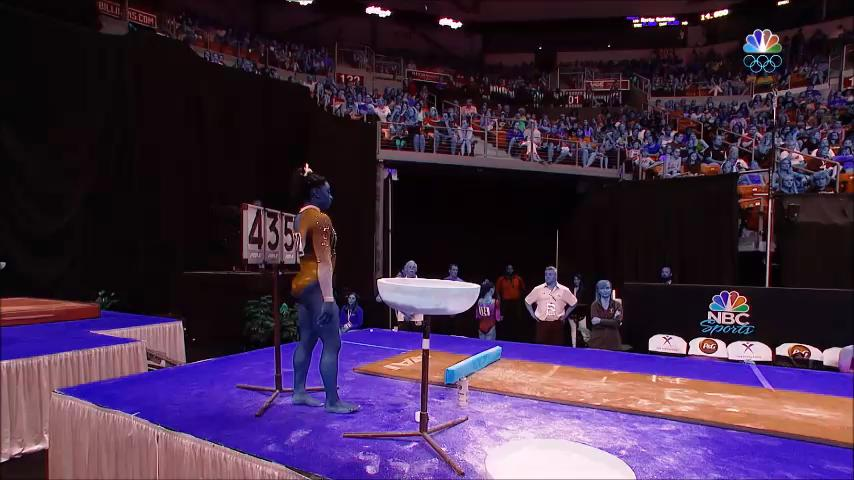

float32 (480, 854, 3) [ 5.  3.  6.]


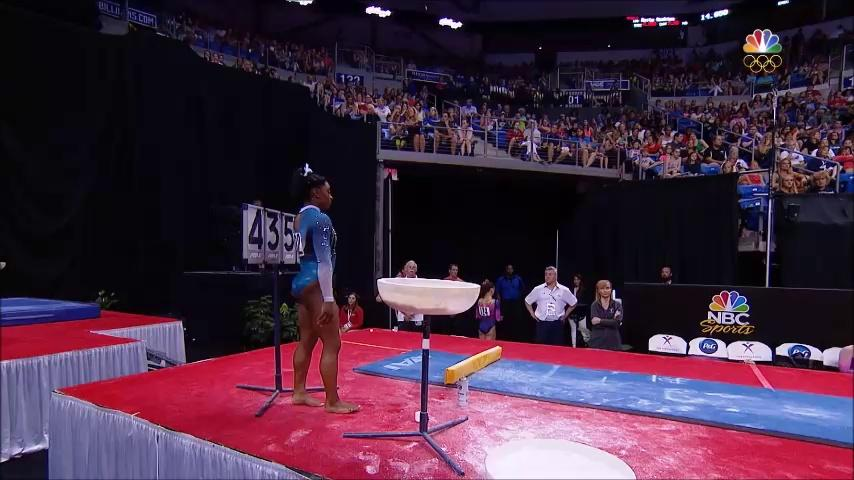

In [50]:
test()